# IMEC2001 Herramientas Computacionales 
## Clase 3 - Derivación e integración simbólica

---

## TABLA DE CONTENIDO


- 1. Concepto de objeto
- 2. Cargar Librerías sympy
- 3. Objeto symbol
- 4. Operaciones matemáticas y expresiones simbólicas
- 5. Diferenciación
- 6. Integración
- 7. Evaluación numérica

<a id="section1"></a>
# Sección 1: Datos Tabulares con `pandas`

## 1. Concepto de Objeto

Un objeto es una collección de variables y métodos.
Estas variables y métodos se definen a través de una 'clase' que especifica la descripción de los objetos que comparten un mismo tipo.

In [2]:
class Estudiante:
    nombre = ""
    apellido = ""
    cursoFavorito= ""

Esta clase definió unicamente variables para un estudiante

In [5]:
#Podemos crear un objeto de tipo estudiante:
juan=Estudiante()
type(juan)

__main__.Estudiante

In [6]:
#Podemos extender la clase Estudiante para incluir methodos.
#El método init es el "constructor" de la clase, el cual nos sirve  para construir nuevos objetos del tipo Estudiante
# a través de pasar algunos argumentos.
class Estudiante:
    nombre = ""
    apellido = ""
    cursoFavorito= ""

    def __init__(self,nombre,apellido,cursoFavorito):
        self.nombre=nombre
        self.apellido=apellido
        self.cursoFavorito=cursoFavorito        

    def saluda(self):
        print('hola, mi nombre es {} {}, mi curso favorito es {}'.format(self.nombre,self.apellido,self.cursoFavorito))

juan=Estudiante('Juan','Lopez','Herramientas Computacionales')
ana=Estudiante('Jonathan','Camargo','Soft Robotics')
juan.saluda()
ana.saluda()

hola, mi nombre es Juan Lopez, mi curso favorito es Herramientas Computacionales
hola, mi nombre es Jonathan Camargo, mi curso favorito es Soft Robotics


Casi todas las librerías que utilizan en python están hechas a partir de clases ("class") definiendo variables y métodos internos a la clase. Por ejemplo la librería sympy que utilizaremos a continuación.

## 2. Cargar Librería sympy

In [7]:
# Primero instalar sympy 
# !pip install sympy

In [ ]:
import sympy
from sympy import symbols
# Utilizaremos symbols el cual es una función que nos permite crear objetos para álgebra simbólica

## 3. Objeto symbol

In [14]:
#Creamos una variable simbólica 'a' y una variable 'b'
a=symbols('a')
b=symbols('b')

#Podemos construir expresiones a partir de los simbolos a y b
expr1=a+b


In [21]:
#Manipular expresiones operando
expr**2

(a + b)**2

In [20]:
#Manipular expresiones substituyendo variables por otra expresión
expr.subs({a:b**-1})

b + 1/b

Vea toda la documentación de sympy <a href="https://docs.sympy.org/latest/tutorials/intro-tutorial/features.html">aqui</a>

## 4. Operaciones matemáticas y expresiones simbólicas

In [22]:
#Continuemos creando expresiones y manipulandolas

In [25]:
from sympy import sin,cos

#Podemos crear varios simbolos a la vez
[theta,alpha,r_1,r_2]=symbols('theta,alpha,r_1,r_2')

expr1=r_1*sin(theta)
expr2=r_2*cos(theta)

expr3=expr1**2+expr2**2
expr3

r_1**2*sin(theta)**2 + r_2**2*cos(theta)**2

In [27]:
#Que pasa si r1=r2?
expr3.subs({r_1:r_2})

r_2**2*sin(theta)**2 + r_2**2*cos(theta)**2

In [28]:
#El sistema CAS reemplaza la variable, pero claramente podríamos simplificar
expr4=expr3.subs({r_1:r_2})
expr4.simplify()

r_2**2

In [29]:
#Esto lo podríamos hacer sin asignar una nueva variable expr4
expr3.subs({r_1:r_2}).simplify()

r_2**2

## 5. Diferenciación simbólica

In [34]:
#Podemos encontrar la derivada de una expresión respecto a la variable de interés
expr=r_1*sin(theta+alpha)
expr

r_1*sin(alpha + theta)

In [37]:
expr.diff(r_1)

sin(alpha + theta)

In [39]:
expr.diff(alpha)

r_1*cos(alpha + theta)

In [41]:
#A veces las variables en las expresiones pueden ser implicitamente función de otras.
# Esto ocurre por ejemplo en sistemas dinámicos muchas variables son función del tiempo.
# Para esto no se definen como symbol sino como funciones:

from sympy import Function

t=symbols('t')
x=Function('x')

expr=x(t)
expr

x(t)

In [42]:
# Podemos crear expresiones más complicadas
3*x(t)**2+2*x(t)+1

3*x(t)**2 + 2*x(t) + 1

In [43]:
# Podemos derivar respecto al simbolo t. Observe que diff aplica la regla de la cadena y aparecen términos dx/dt
expr=3*x(t)**2+2*x(t)+1
expr.diff(t)

6*x(t)*Derivative(x(t), t) + 2*Derivative(x(t), t)

## 6. Integración simbólica

In [88]:
#La función es integrate. Pero observe que no añade una constante de integración y el usuario tendría que añadir ese término si es necesario
expr=r_1*sin(theta)
sympy.integrate(expr,theta)

-r_1*cos(theta)

In [89]:
#Podemos hacer integrales definidas
expr=r_1*sin(theta)
aa=sympy.integrate(expr,(theta,0,sympy.pi))
aa

2*r_1

## 7. Evaluación numérica

(-1.0, 1.0)

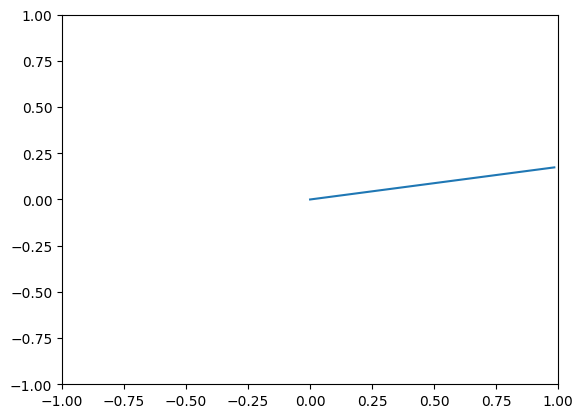

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Una vez se tienen expresiones simbólicas se puede evaluar reemplazando valores para las variables
expr1=r_1*cos(theta)
expr2=r_1*sin(theta)

# Pruebe cambiar el angulo por otros valores
valores={r_1:1,theta:np.deg2rad(10)}

p=[expr1.subs(valores),expr2.subs(valores)]

plt.plot([0,p[0]],[0,p[1]])
plt.xlim([-1,1])
plt.ylim([-1,1])

In [110]:
# Una forma más clara es convertir expresiones simbólicas en funciones que retornan un valor numérico

expr1=r_1*cos(theta)
expr2=r_1*sin(theta)


def punto(r_1_numeric,theta_numeric):
    valores={r_1:r_1_numeric,theta:theta_numeric}
    p=[expr1.subs(valores),expr2.subs(valores)]
    return p

punto(1,np.deg2rad(10))

[0.984807753012208, 0.173648177666930]

(-1.0, 1.0)

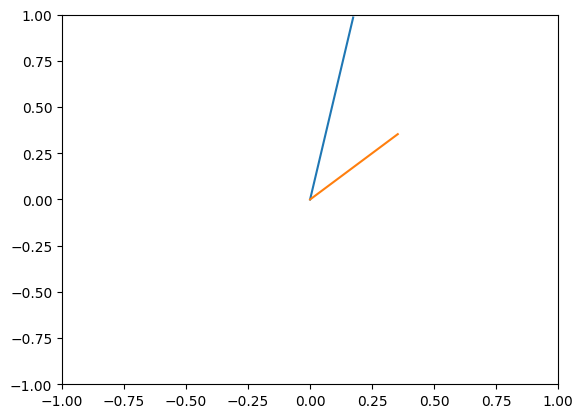

In [113]:
# De esta manera solo llamamos la función punto cada vez que queremos evaluar la expresión


In [118]:
# Sympy ya tiene incorporado un método para crear estas funciones y hacer la substitución más eficientemente.
# Lambdify crea funciones que reciben los argumentos numericos y evalúa la substitución.

expr1=r_1*cos(theta)

expr1_fun=sympy.lambdify([r_1,theta],expr1)

expr1_fun(1,np.deg2rad(10))

0.984807753012208

In [120]:
expr1=r_1*cos(theta)
expr2=r_1*sin(theta)

expr1_fun=sympy.lambdify([r_1,theta],expr1)
expr2_fun=sympy.lambdify([r_1,theta],expr2)

(-1.0, 1.0)

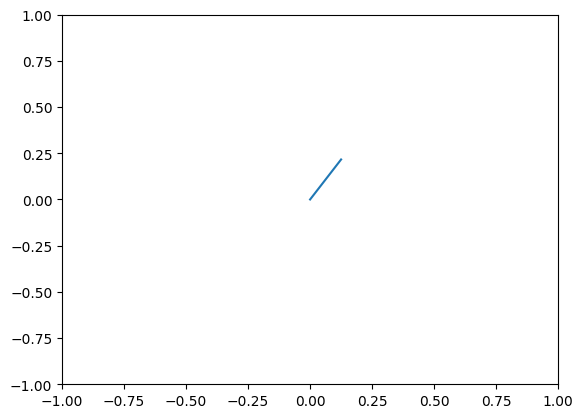

In [124]:
angulo=60
radio=0.25
p=[expr1_fun(radio,np.deg2rad(angulo)),expr2_fun(radio,np.deg2rad(angulo))]
plt.plot([0,p[0]],[0,p[1]])
plt.xlim([-1,1])
plt.ylim([-1,1])